In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
stock = pd.read_csv("C:/Users/rudal/OneDrive/Ai/stock.csv")

In [3]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [4]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [5]:
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [32]:
stock_AJ = stock[stock['Code']=='A005930']

In [33]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [34]:
stock_AJ

,Date,Open,High,Low,Close,Volume
746,20210601,80500,81300,80100,80600,14058401
2746,20210602,80400,81400,80300,80800,16414644
4746,20210603,81300,83000,81100,82800,29546007
6746,20210604,82700,82700,81500,82200,18112259
8746,20210607,82700,82800,81600,81900,16496197
...,...,...,...,...,...,...
978746,20230523,68500,68700,68100,68400,8561643
980746,20230524,68100,68700,68000,68500,8192896
982746,20230525,69900,70000,68700,68800,14231160
984746,20230526,69800,70400,69500,70300,19549511


In [35]:
stock_AJ['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [36]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [37]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
746,0.909677,0.932660,0.937086,0.149371
2746,0.906452,0.936027,0.943709,0.191824
4746,0.935484,0.989899,0.970199,0.428413
6746,0.980645,0.979798,0.983444,0.222410
8746,0.980645,0.983165,0.986755,0.193293
...,...,...,...,...
978746,0.522581,0.508418,0.539735,0.050335
980746,0.509677,0.508418,0.536424,0.043691
982746,0.567742,0.552189,0.559603,0.152484
984746,0.564516,0.565657,0.586093,0.248305


In [38]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.491550,0.485639,0.502098,0.161701
std,0.256053,0.265796,0.260946,0.098114
min,0.000000,0.000000,0.000000,0.000000
25%,0.274194,0.259259,0.281457,0.097524
50%,0.458065,0.449495,0.473510,0.140432
75%,0.709677,0.719697,0.725166,0.200042
max,1.000000,1.000000,1.000000,1.000000


In [39]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [40]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.3806451612890947, 0.37037037036912335, 0.4006622516543024, 0.043315320228959425], [0.4354838709663371, 0.4141414141400197, 0.4470198675481887, 0.11831406668726484], [0.43870967741793965, 0.4141414141400197, 0.430463576157515, 0.08968209335823597], [0.4419354838695421, 0.4242424242409958, 0.46026490066072756, 0.15609683132586163], [0.49999999999838707, 0.49831649831482044, 0.5198675496671528, 0.2627157278592777], [0.519354838708002, 0.5185185185167727, 0.5364238410578264, 0.15679236454286077], [0.5225806451596046, 0.5084175084157966, 0.5397350993359611, 0.05033518975216008], [0.5096774193531945, 0.5084175084157966, 0.5364238410578264, 0.043691427780116227], [0.5677419354820396, 0.5521885521866929, 0.5596026490047695, 0.1524836043682957], [0.564516129030437, 0.565656565654661, 0.5860927152298474, 0.24830501614325634]] -> [0.6501650164995044]


In [41]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [42]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, SimpleRNN 

# 임의의 입력 데이터 생성
X = np.random.rand(100, 10, 4)  # (샘플 수, 시간 단계 수, 특성 수) 형태의 데이터 생성

# 첫 번째 모델
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(SimpleRNN(units=20, activation='relu'))  # SimpleRNN을 사용합니다.
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

# 두 번째 모델
model = Sequential()
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()
# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_12 (Dropout)        (None, 10, 20)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2841 (11.10 KB)
Trainable params: 2841 (11.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_9

In [45]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_18 (Dropout)        (None, 10, 20)            0         
                                                                 
 lstm_8 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 5s 12ms/step - loss: 0.4298
Epoch 2/70
12/12 [==============================] - 0s 11ms/step - loss: 0.2528
Epoch 3/70
12/12 [==============================] - 0s 11ms/step - loss: 0.0601
Epoch 4/70
12/12 [==============================] - 0s 11ms/step - loss: 0.0351
Epoch 5/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0210
Epoch 6/70
12/12 [==============================] - 0s 14ms/step - loss: 0.0178
Epoch 7/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 8/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0135
Epoch 9/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0139
Epoch 10/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0109
Epoch 11/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 12/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 13/70
12/12 [==================

In [47]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 1s 6ms/step - loss: 0.0039


0.003858353476971388

In [48]:
y_pred = model.predict(test_X)

5/5 [==============================] - 0s 6ms/step


In [49]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0038583535247386893


5/5 [==============================] - 0s 6ms/step


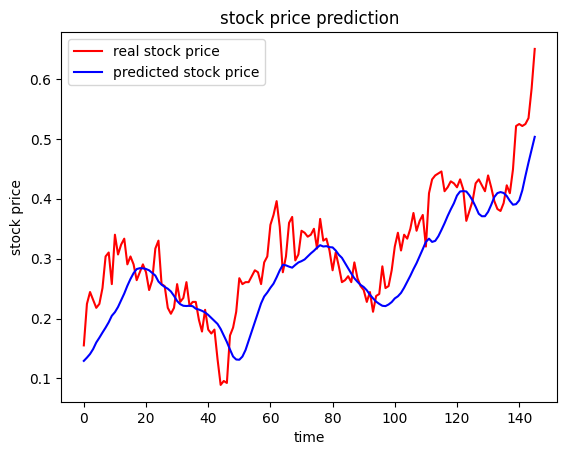

In [50]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
